JPEG compression
JPEG compression main steps:

- RGB color space to YCbCr color space conversion:
- - YCbCr (aka YCC) is the color space used in digital formats JPEG and MPEG.
- -  Range: R, G, B, Y ∈ [0, 255]
- - Conversion RGB-YCbCr:

((870, 1296, 3),
 (870, 1296, 3),
 (870, 1296, 3),
 (870, 1296, 3),
 (870, 1296, 3),
 (870, 1296, 3))

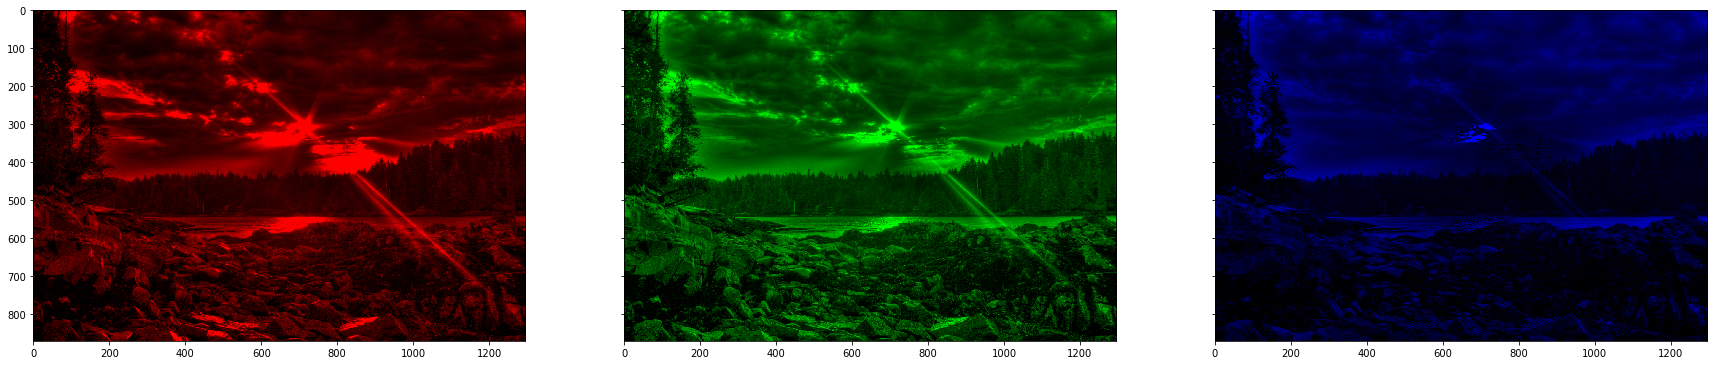

In [72]:
#Conversion RGB-YCbCr:
# read image RGB
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

img = mpimg.imread("./test.png")

M, N, O = img.shape
R = np.ndarray(img.shape)
R[:,:,0]= img[:,:,0]
R[:,:,1]= np.zeros( (M, N))
R[:,:,2]= np.zeros( (M, N))


G = np.ndarray(img.shape)
G[:,:,0]= np.zeros( (M, N))
G[:,:,1]= img[:,:,1]
G[:,:,2]= np.zeros( (M, N))


B = np.ndarray(img.shape)
B[:,:,0]= np.zeros( (M, N))
B[:,:,1]= np.zeros( (M, N))
B[:,:,2]= img[:,:,2]

fig, ax =  plt.subplots(
        ncols=3, 
        sharex=True, 
        sharey=True,
        figsize=(30, 30)
)

ax[0].imshow(R)
ax[1].imshow(G)
ax[2].imshow(B)

Y = np.add(np.add(0.299  * R,0.587 * G), 0.114  * B)
Cb = - 0.1687  * R - 0.3313  * G + 0.5  * B + 128
Cr = 0.5  * R - 0.4187  * G - 0.0813  * B + 128
R = Y + 1.402 * (Cr - 128)
G = Y - 0.34414  * (Cb - 128) - 0.71414  * (Cr - 128)
B = Y + 1.772 * (Cb - 128)

Y.shape , Cb.shape , Cr.shape, R.shape, G.shape, B.shape

In [75]:
res = 0.299  * R
res.shape

(870, 1296, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
1
2
3
4
5


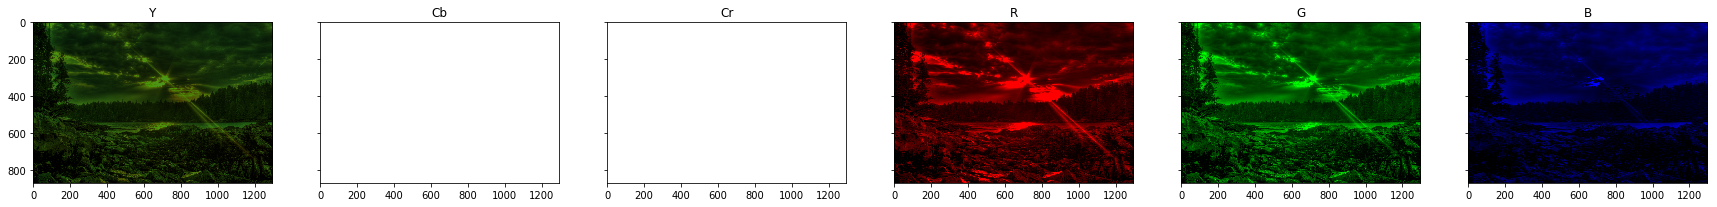

In [67]:
# getvariable names 

# showImgs([], ["Y","Cb","Cr","R","G","B"], plt.cm.Spectral)
images = [Y,Cb,Cr,R,G,B]
titles = "Y","Cb","Cr","R","G","B"
fig, ax =  plt.subplots(
        ncols=len(images), 
        sharex=True, 
        sharey=True,
        figsize=(30, 30)
)
for index, im in enumerate(images):
    ax[index].imshow(im)
    ax[index].set_title(titles[index])

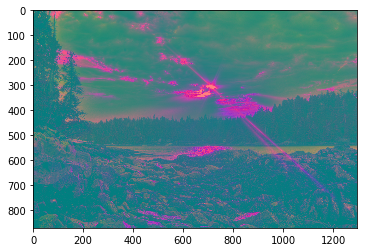

In [71]:
from PIL import Image
image = Image.open("./test.png")
ycbcr = image.convert('YCbCr')
plt.imshow(ycbcr)
npmat = np.array(ycbcr, dtype=np.uint8)
ready_Y = npmat[:,:,0]
ready_Cb = npmat[:,:,1]
ready_Cr = npmat[:,:,2]